# <strong> A - Importation de modules </strong>

In [1]:
############################################
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

############################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cluster , metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold, decomposition

############################################
import seaborn as sns
#%matplotlib inline
#%matplotlib notebook
sns.set()

###########################################
#!pip install opencv-python
import cv2

###########################################
import import_ipynb
from P6_01_My_functions_Kengni_zanguim_Brice_062022 import *

##########################################
PATH_IMAGE =  "/media/brice_kengni_zanguim/Samsung_T5/Téléchargements/photos"

importing Jupyter notebook from P6_01_My_functions_Kengni_zanguim_Brice_062022.ipynb


# <strong> B - Importation de données </strong>

In [2]:
picts = pd.read_csv("photos_leger.csv")

In [3]:
train_idx, _ = get_train_test_index( picts,"label", (350,1) )

In [4]:
picts = picts.loc[train_idx,:]

In [5]:
picts = load_images( picts, "photo_id",PATH_IMAGE)

In [6]:
picts

,label,photo_id,images
16,menu,6LJa8QZOGBjt9maE5miLhw.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
34,drink,VYP7IZ8SjyRLM1II5WcKew.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
129,drink,cyzJVw9Xx5akGxmCqHlecw.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
180,outside,OQy9H7iEhEi8iHOKUTcByA.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
380,drink,Gtt10Yv5sWpmQP3QxggDJA.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...,...
199354,outside,eVTIdzoDzyZ4fD5yP0YDHw.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
199526,menu,DzO_dkD8IXdci-Wklt6cdw.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
199628,inside,in5rPvNZJzhOk1LMX3XiwQ.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
199647,outside,inoSilLG8zCFUci0i-FPbw.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


# <strong> C - Traitement des images </strong>

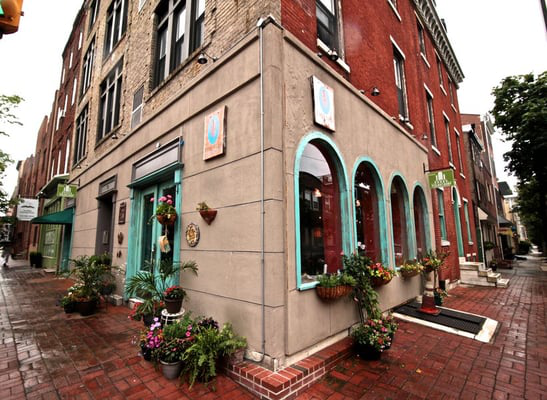

In [7]:
picts.images.iloc[893]

In [8]:
picts = process_images( picts, 'images', 'EC' )

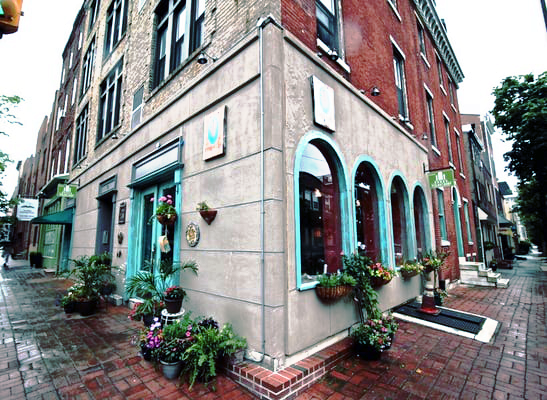

In [9]:
picts["images_process"].iloc[893]

# <strong> D - catégories d'images </strong>


Categorie : menu


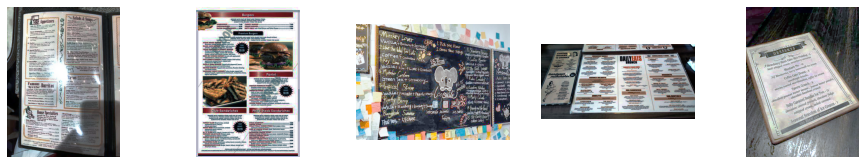


Categorie : drink


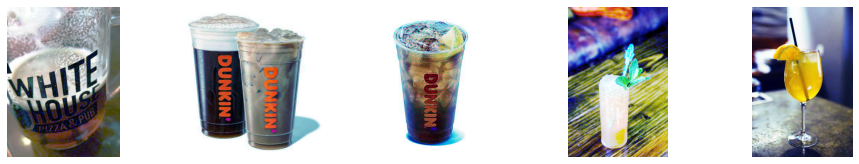


Categorie : outside


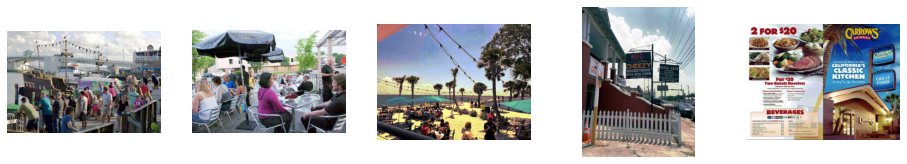


Categorie : food


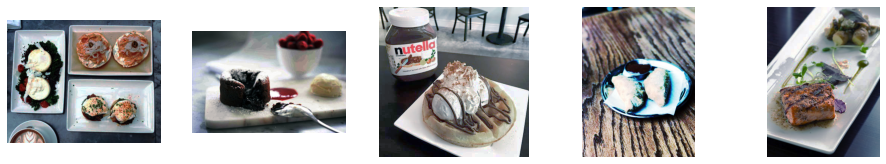


Categorie : inside


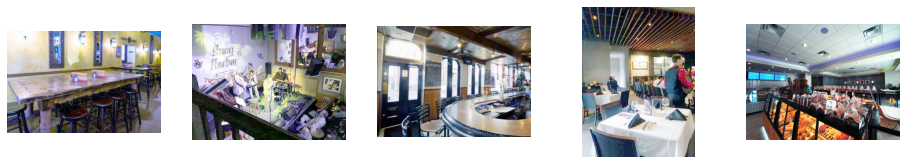

In [10]:
n_img = 5

for k, i in enumerate(picts.label.unique()) :
    print(f"\nCategorie : {i}")
    choose_img = np.random.choice( picts.images_process[picts.label == i], n_img, replace = False)
    plt.figure(figsize=(16,16))
    for j in range(n_img) :
        plt.subplot( len( picts.label.unique() ), n_img , k*n_img + j + 1 )
        plt.imshow( choose_img[j] )
        plt.grid(False)
        plt.axis('off')
    plt.show()

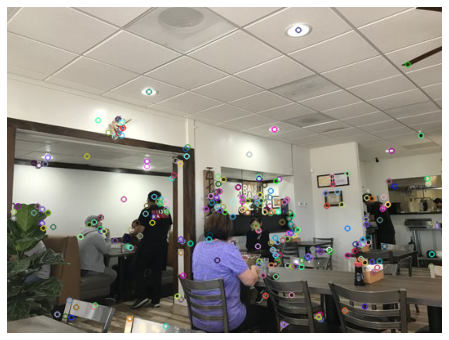

(300, 128)


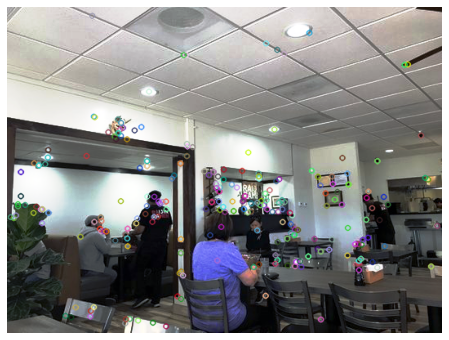

(300, 128)


In [11]:
a = show_feat_get_descrip(  picts.images.iloc[293] , show_feat=True)
print(a.shape)
a = show_feat_get_descrip(  picts.images_process.iloc[293] , show_feat=True)
print(a.shape)

# <strong> E - Calcul des descripteurs de chaque Images </strong>

In [12]:
picts["descripteurs"] = picts.images_process.apply( lambda image : show_feat_get_descrip(image, n_feat=1000 , show_feat=False) )

In [13]:
tous_les_descripteurs_sift = picts.descripteurs.values 

# <strong> F - Histogramme de répartition de descripteurs par images </strong>

In [14]:
bag_of_features = histogram_d_image( tous_les_descripteurs_sift )

# <strong> G - Réduction de dimension avec une ACP </strong>

In [15]:
print("Dimensions dataset après réduction PCA : ", bag_of_features.shape)
pca = decomposition.PCA(n_components=0.99)
reduce_bag_of_features= pca.fit_transform(bag_of_features)
print("Dimensions dataset après réduction PCA : ", reduce_bag_of_features.shape)

Dimensions dataset après réduction PCA :  (1750, 1633)
Dimensions dataset après réduction PCA :  (1750, 1170)


# <strong> H -  Visualisation des clusters : t-SNE </strong>

In [16]:
tsne = manifold.TSNE(n_components=2, perplexity=15, n_iter=3000, init='pca', n_jobs= os.cpu_count() )
X_tsne = tsne.fit_transform( reduce_bag_of_features )

### <strong> Vrais labels </strong>

<AxesSubplot:>

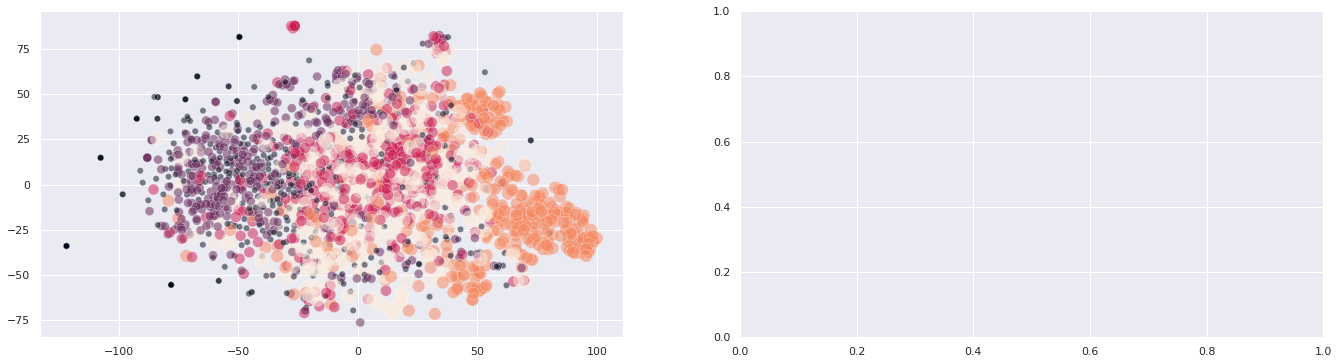

In [17]:
label_encoder = preprocessing.LabelEncoder().fit(picts.label)
True_label = label_encoder.transform(picts.label) + 1

fig , axes = plt.subplots( 1, 2 ,figsize = (23, 6) )
sns.scatterplot(X_tsne[:,0], X_tsne[:,1],  c = True_label, alpha=0.5, s=40*True_label, ax=axes[0] )
#sns.scatterplot(tsne.embedding_[:,0], tsne.embedding_[:,2],  c = True_label, alpha=0.5, s=40*True_label, ax=axes[1] )
#sns.scatterplot(tsne.embedding_[:,1], tsne.embedding_[:,2],  c = True_label, alpha=0.5, s=40*True_label, ax=axes[2] )

# <strong> I -  KMEANS clustering </strong>

In [18]:
clustering_model = cluster.MiniBatchKMeans(n_clusters = 5 , init_size = 20 ,  max_iter = 200, n_init = 40)
clustering_model.fit(  X_tsne   )

MiniBatchKMeans(init_size=20, max_iter=200, n_clusters=5, n_init=40)

In [19]:
Kmeans_label = clustering_model.labels_ + 1

<AxesSubplot:>

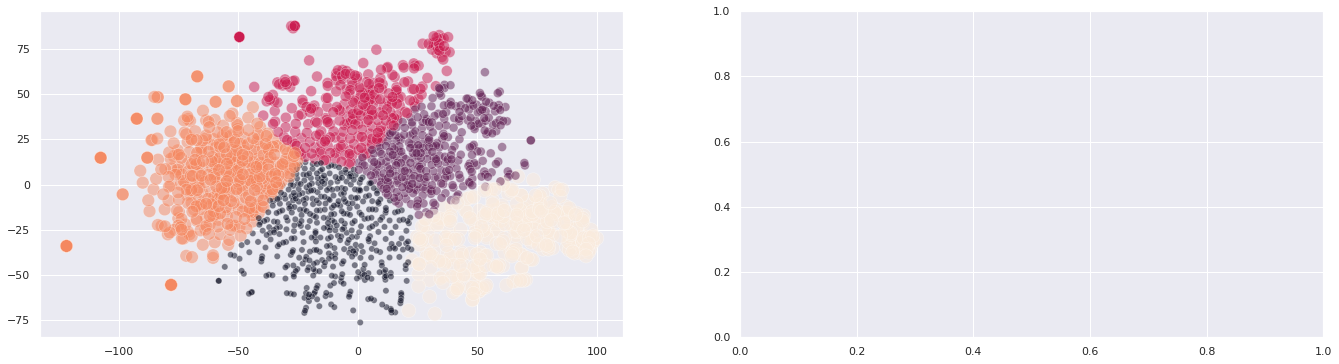

In [20]:
fig , axes = plt.subplots( 1, 2 ,figsize = (23, 6) )
sns.scatterplot(X_tsne[:,0], X_tsne[:,1],  c = Kmeans_label, alpha=0.5, s=40*Kmeans_label, ax=axes[0] )
#sns.scatterplot(tsne.embedding_[:,0], tsne.embedding_[:,2],  c = Kmeans_label, alpha=0.5, s=40*Kmeans_label, ax=axes[1] )
#sns.scatterplot(tsne.embedding_[:,1], tsne.embedding_[:,2],  c = Kmeans_label, alpha=0.5, s=40*Kmeans_label, ax=axes[2] )

In [21]:
metrics.adjusted_rand_score( True_label , Kmeans_label , )

0.16852536748252842